In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import (

    Binarizer,
    KBinsDiscretizer,
    MinMaxScaler,
    Normalizer,
    RobustScaler,
    StandardScaler,
)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.tree import plot_tree



ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv("/content/data_playlist.csv")
df.sample(5)


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
212,0.3570,0.656,291867,0.565,0.000192,9,0.0629,-8.722,1,0.0301,77.049,4,0.615,1
69,0.9930,0.581,215000,0.233,0.872000,9,0.0737,-17.979,1,0.0460,129.506,4,0.888,1
427,0.0234,0.876,232000,0.710,0.000161,11,0.0573,-6.446,0,0.0446,121.072,4,0.828,0
656,0.0144,0.818,204957,0.769,0.000122,11,0.0767,-5.761,0,0.2710,125.944,4,0.622,0
518,0.7530,0.604,223280,0.457,0.000000,5,0.1240,-6.942,0,0.0304,136.968,4,0.306,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


Acousticness:
 0 low, 1 high --> Cualitativa Ordinal
 Vble Entrada
 Numérica, no tiene datos faltantes,

In [ ]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=e676e9694794b04a6720302948732e64583f70c3367ab6b150a72c3276841277
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Usando pandas
profilingreport = ProfileReport(df, title='Spotify', minimal=True)
profilingreport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
CUANTI = ['duration', 'liveness', 'loudness', 'speechiness', 'tempo','acousticness','danceability','energy','instrumentalness', 'valence']
CUALIS = ['key', 'mode', 'time_signature']
TARGET = ['label']

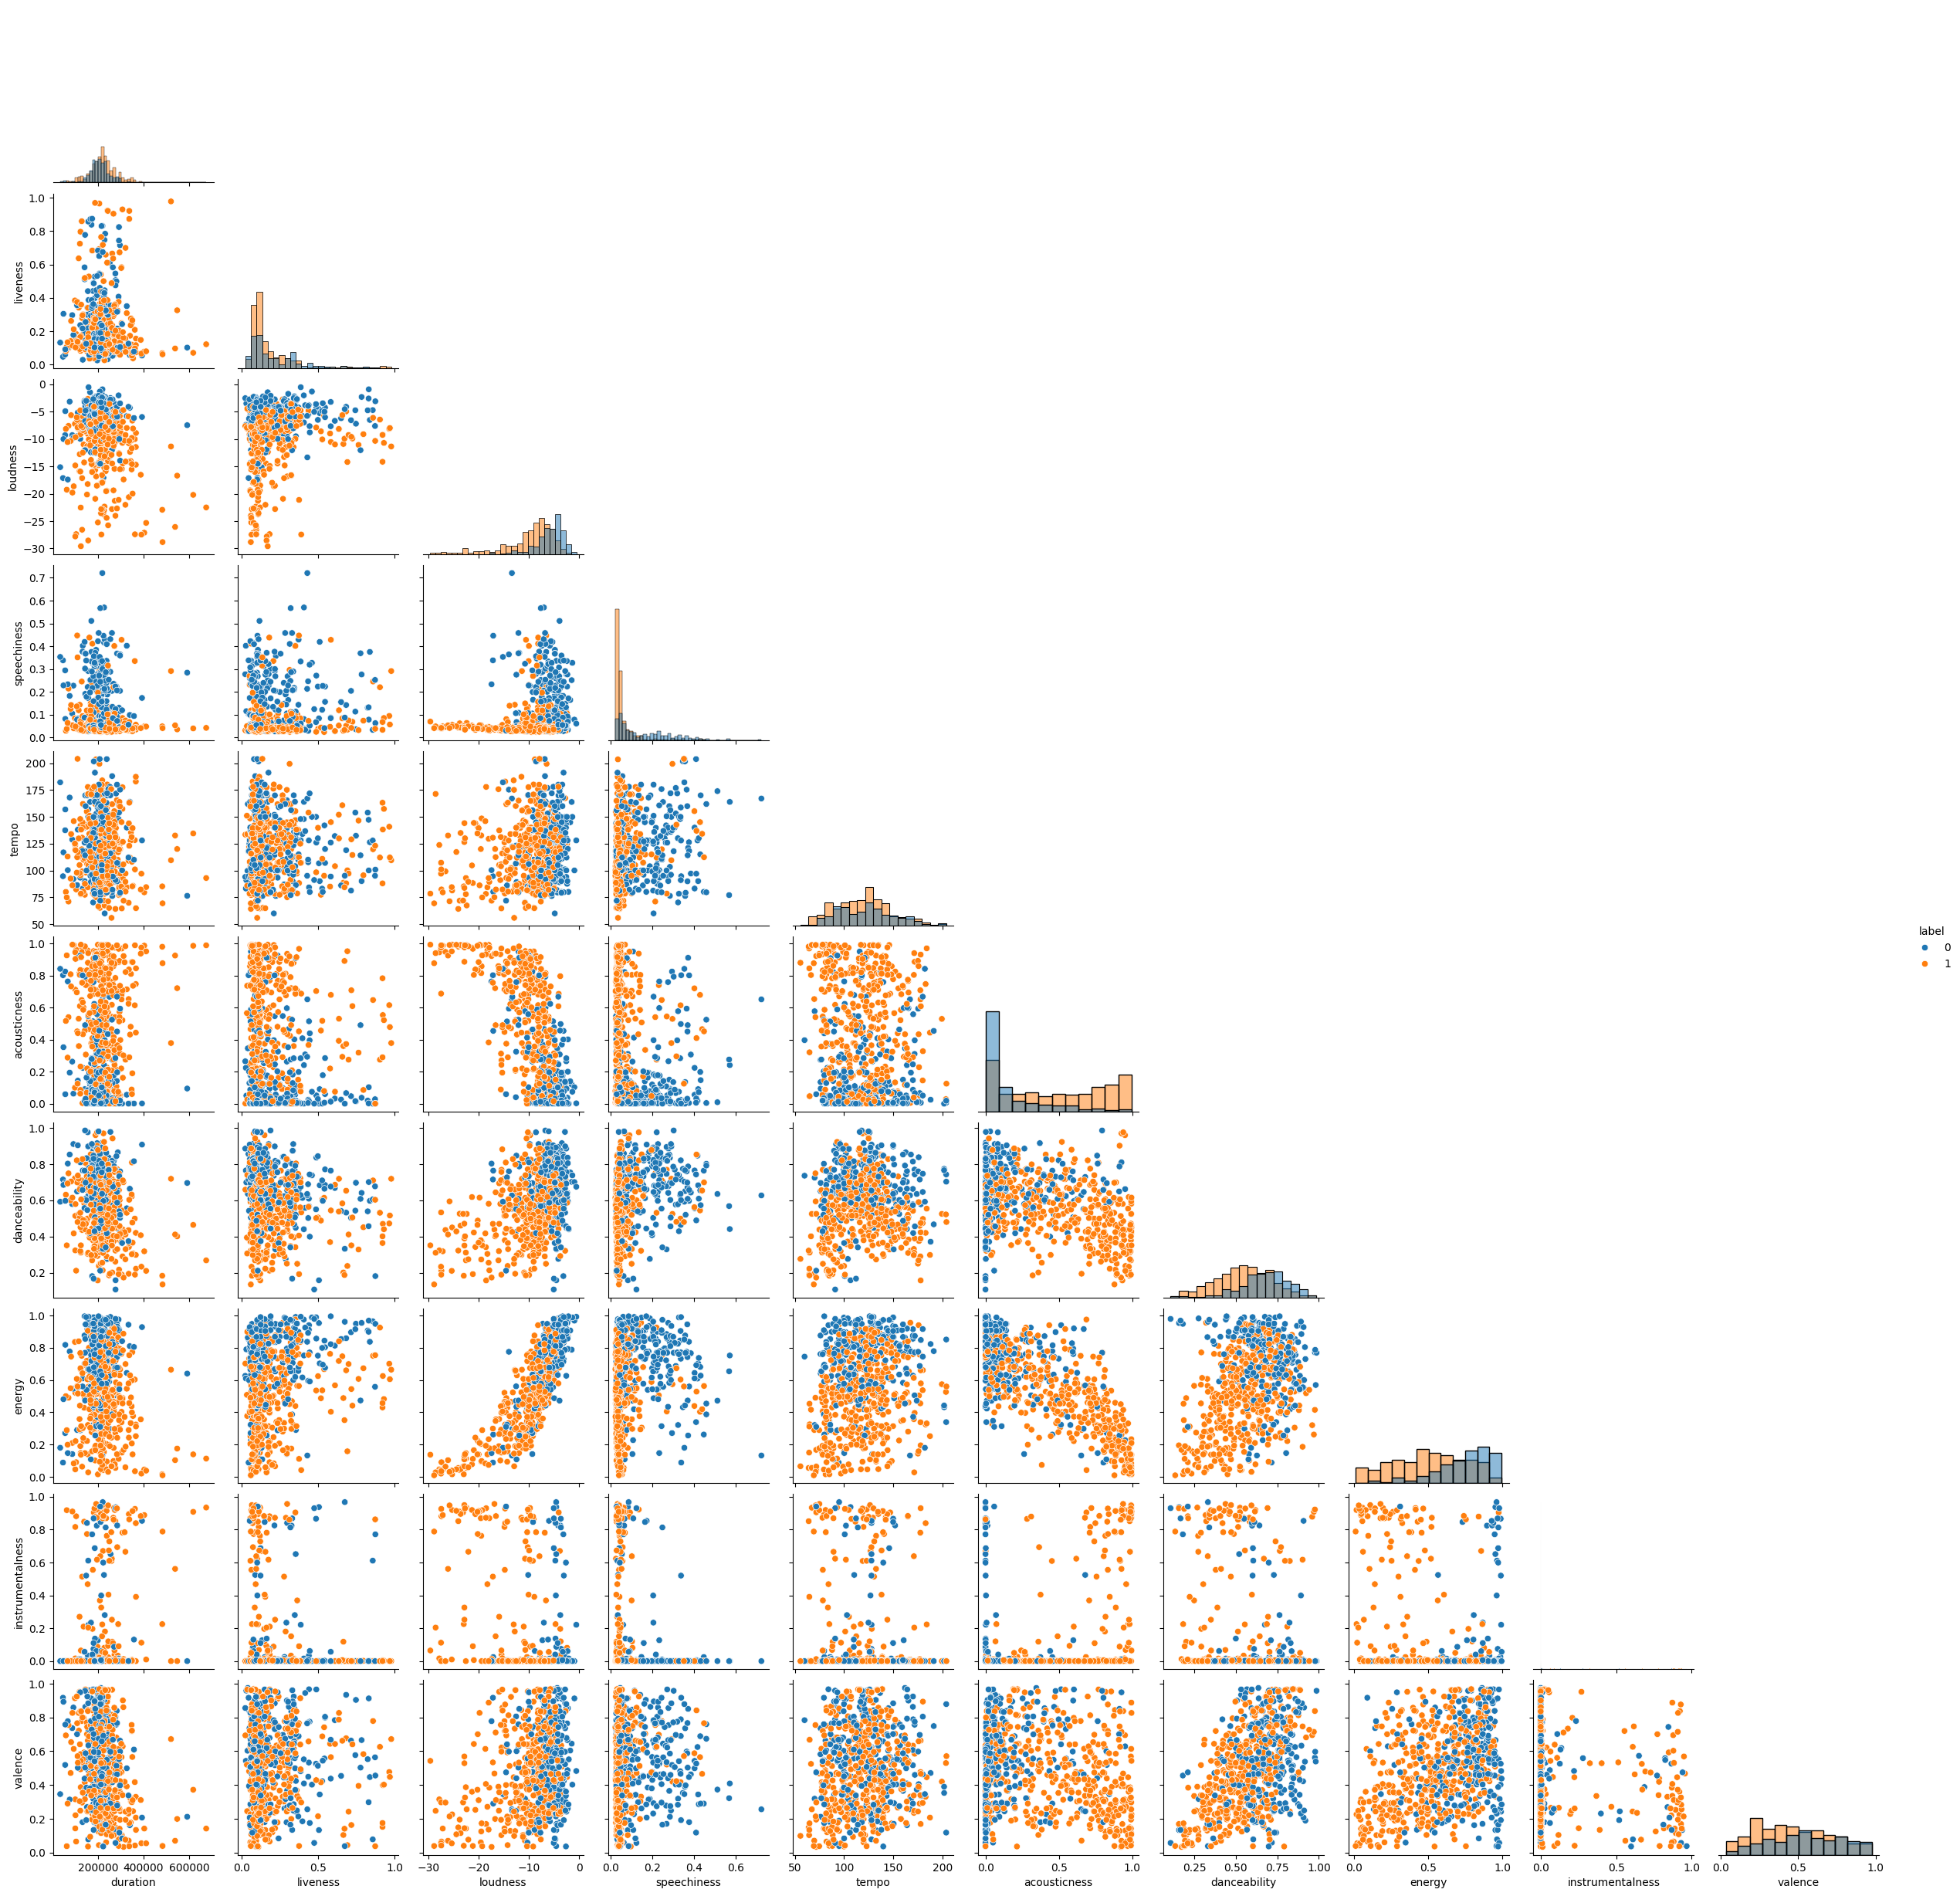

In [ ]:
sns.pairplot(df[CUANTI+TARGET],  hue='label', corner = True, diag_kind='hist')

In [ ]:
#Correlación pearson (suponiendo normalidad)
df[CUANTI].corr()

,duration,liveness,loudness,speechiness,tempo,acousticness,danceability,energy,instrumentalness,valence
duration,1.000000,-0.002576,-0.179952,-0.110645,-0.052321,0.054988,-0.231120,-0.093435,0.161803,-0.256984
liveness,-0.002576,1.000000,0.154176,0.106747,-0.008093,-0.140326,-0.115735,0.235887,-0.050720,0.051110
loudness,-0.179952,0.154176,1.000000,0.188873,0.188127,-0.695163,0.396021,0.830081,-0.429529,0.294852
speechiness,-0.110645,0.106747,0.188873,1.000000,0.139993,-0.215614,0.272283,0.173371,-0.145104,0.101257
tempo,-0.052321,-0.008093,0.188127,0.139993,1.000000,-0.149472,0.064002,0.197741,-0.081531,0.076123
acousticness,0.054988,-0.140326,-0.695163,-0.215614,-0.149472,1.000000,-0.417974,-0.781691,0.331659,-0.233485
danceability,-0.231120,-0.115735,0.396021,0.272283,0.064002,-0.417974,1.000000,0.360971,-0.238865,0.483361
energy,-0.093435,0.235887,0.830081,0.173371,0.197741,-0.781691,0.360971,1.000000,-0.267846,0.364495
instrumentalness,0.161803,-0.050720,-0.429529,-0.145104,-0.081531,0.331659,-0.238865,-0.267846,1.000000,-0.228774
valence,-0.256984,0.051110,0.294852,0.101257,0.076123,-0.233485,0.483361,0.364495,-0.228774,1.000000


In [ ]:
#comparo con speraman, vemos que se mantienen bastante las correlaciones
df[CUANTI].corr(method='spearman')

,duration,liveness,loudness,speechiness,tempo,acousticness,danceability,energy,instrumentalness,valence
duration,1.000000,-0.067009,-0.108512,-0.148645,-0.023231,0.003941,-0.186048,-0.053521,0.176152,-0.218335
liveness,-0.067009,1.000000,0.187114,0.090218,0.040345,-0.149255,-0.109162,0.251158,-0.061450,0.077277
loudness,-0.108512,0.187114,1.000000,0.274023,0.149449,-0.686011,0.339660,0.848091,-0.205649,0.259560
speechiness,-0.148645,0.090218,0.274023,1.000000,0.123034,-0.271342,0.335635,0.264970,-0.165067,0.133119
tempo,-0.023231,0.040345,0.149449,0.123034,1.000000,-0.154735,0.035274,0.200447,-0.065278,0.071147
acousticness,0.003941,-0.149255,-0.686011,-0.271342,-0.154735,1.000000,-0.363340,-0.743377,0.085909,-0.156936
danceability,-0.186048,-0.109162,0.339660,0.335635,0.035274,-0.363340,1.000000,0.315278,-0.112292,0.463139
energy,-0.053521,0.251158,0.848091,0.264970,0.200447,-0.743377,0.315278,1.000000,-0.083769,0.346892
instrumentalness,0.176152,-0.061450,-0.205649,-0.165067,-0.065278,0.085909,-0.112292,-0.083769,1.000000,-0.168047
valence,-0.218335,0.077277,0.259560,0.133119,0.071147,-0.156936,0.463139,0.346892,-0.168047,1.000000


De la métrica de correlación podemos ver que solo 3 variables presentan linealidad entre sí, el resto de las variables podemos decir que no tienen relación lienal entre sí. Analizando más:
-  **energy** y **loudness** presentan una relación lineal positiva, lo cuál tiene sentido ya que, por definicón, uno de los componenetes de la medida de energía es **loudness**
- **energy** y **acousticness** tienen una relación lineal negativa, es decir que cuanto más acústica sea la canción menor energía presenta
- De una manera similar sucede entre **loudness** y **acousticness** siendo que cuanto más acústica es una canción que menor componente de instrumentos tiene, por lo que es esperable que tenga menor "ruido" (loudnesss y energía)



# Discretización de Variables
Para nuestro análisis, vamos a hacer la discretización para las siguientes variables, ya que creemos que por la naturaleza de las mismas, la pérdida de información al discretizarlas no afecta "el sginificado" de la variable, y la misma nos trae ventajas como la posibile simplificación del modelo de clasificiación

**INSTRUMENTALLNESS**<br>
Viendo el histograma vemos que es una distribución sesgada al 0, donde el Q3 está en 0.0022 es decir que la mayoría de los datos están conecntrados en el 0. Eso puede ser algo propio de este dataset, pero vemos que probablemente no sea un feature que nos brinde mayor información al modelo.
Ahora, para tratar esta variable, vamos a hacer una discretización binaria para tener una columna "instrumental_bin" con valor:
- 0: no contiene "voces"
- 1: contiene "voces"

<br>En este caso, podemos analizar qué valor de umbral va a dividir a la variable. Podríamos pensar en la media, pero en este caso al tener tanta concentración de valores cercanos al 0, la media no hará una buena división de los datos ya que tambipen está cercana al 0. Por lo tanto, utilizaremos el valor intituitivo de 0,5

Por el desbalance inicial de la variable, la misma discrretizada continúa desbalanceada


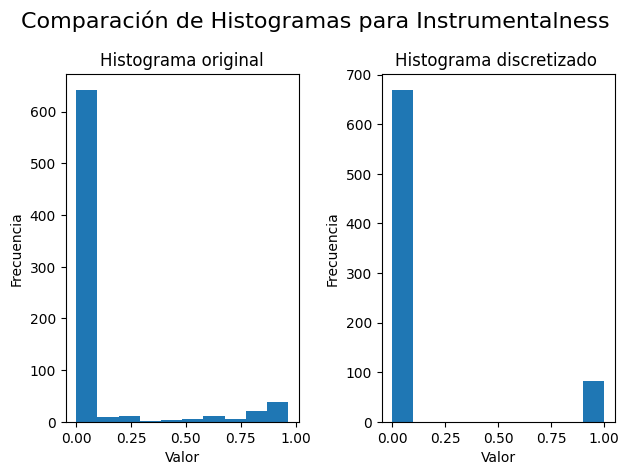

In [ ]:
# Binarizar 0.5
binarizer_default = Binarizer(threshold=0.5)
instrumentalness_bin = binarizer_default.fit_transform(df[['instrumentalness']])

#Grafico Historgamas
plt.subplot(1,2,1)
plt.hist(df['instrumentalness'])
plt.title('Histograma original')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.hist(instrumentalness_bin)
plt.title('Histograma discretizado ')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.suptitle('Comparación de Histogramas para Instrumentalness', fontsize=16)
plt.tight_layout()


**SPEECHINESS**<br>
Dada la definición, se pueden tomar tres clasificaciones para esta variable:
- Menores a 0,33: contienen principalmente música y no palabras
- Entre 0,33 y 0,66: contienen mezcla entre mpusica y palabras
- Mayor a 0,66: contiene mayormente palabras

En nuestro caso tomaremos esos umbrales para formar 3 clases representadas por (0,1,2) respectivamente; convirtiendo así la variable en Cualitativa Ordinal

Nuevamente debido al desbalance inicial, el resultado también es desbalanceado


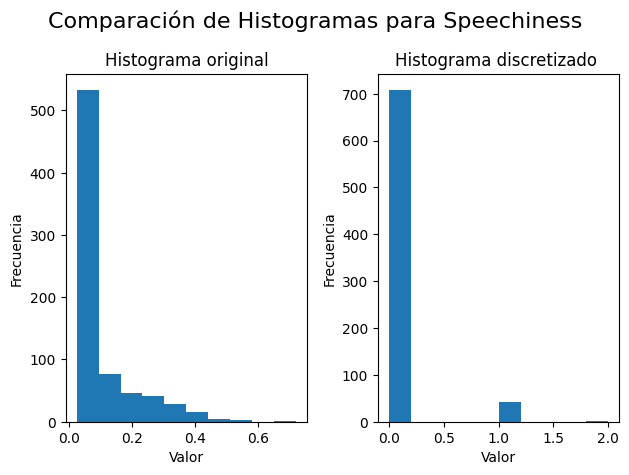

In [ ]:
bins_speech = [0,0.33,0.66,1]
labels_speech = [0,1,2]
speechiness_bin = pd.cut(df['speechiness'], bins=bins_speech, labels=labels_speech)

#Grafico Historgamas
plt.subplot(1,2,1)
plt.hist(df['speechiness'])
plt.title('Histograma original')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.hist(speechiness_bin)
plt.title('Histograma discretizado ')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.suptitle('Comparación de Histogramas para Speechiness', fontsize=16)
plt.tight_layout()


A REVISAR
Creo que si discretizamos acousticness, vamos a perder la linealidad que habiamso visto en el punto anterior, y probablemente estemos modificando mas el problema. Hacer luego la prueba

Vamos a hacer l prueba de discretización / trabajo de otras dos variables que veos que no tienen dist normal ?

In [ ]:
#Prueba con discrtizacion de variables
enc = KBinsDiscretizer(n_bins=4, encode='ordinal')
acoust_disc = enc.fit_transform(df[['acousticness']])
print("Límites bins acousticness:", enc.bin_edges_)
enc_2 = KBinsDiscretizer(n_bins=4, encode='ordinal')
energy_disc = enc_2.fit_transform(df[['energy']])
print("Límites bins energy:", enc_2.bin_edges_)


Límites bins acousticness: [array([1.170e-06, 3.715e-02, 2.445e-01, 6.785e-01, 9.940e-01])]
Límites bins energy: [array([0.00925, 0.42325, 0.6315 , 0.80475, 0.995  ])]


In [ ]:
df_new = df
df_new['instrumentalness'] = instrumentalness_bin
df_new['speechiness'] = speechiness_bin.astype(int)
df_new['acousticness'] = acoust_disc.astype(int)
df_new['energy'] = energy_disc.astype(int)
df_new.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.500000,0.596439,220112.733333,1.500000,0.109333,4.829333,0.203376,-8.509339,0.741333,0.058667,120.405761,3.902667,0.497321,0.602667
std,1.119973,0.172036,65587.690483,1.119973,0.312265,3.636001,0.177609,5.039488,0.438194,0.240767,28.378116,0.400091,0.239615,0.489673
min,0.000000,0.107000,33840.000000,0.000000,0.000000,0.000000,0.024000,-29.601000,0.000000,0.000000,55.747000,1.000000,0.033200,0.000000
25%,0.250000,0.480000,185490.250000,0.250000,0.000000,1.000000,0.094550,-10.173500,0.000000,0.000000,98.998000,4.000000,0.297000,0.000000
50%,1.500000,0.606000,215108.500000,1.500000,0.000000,5.000000,0.129000,-7.270000,1.000000,0.000000,120.104500,4.000000,0.483000,1.000000
75%,2.750000,0.715750,244236.750000,2.750000,0.000000,8.000000,0.264750,-5.097750,1.000000,0.000000,138.074750,4.000000,0.684500,1.000000
max,3.000000,0.986000,675360.000000,3.000000,1.000000,11.000000,0.979000,-0.533000,1.000000,2.000000,204.162000,5.000000,0.975000,1.000000


In [ ]:

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    int64  
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    int64  
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    int64  
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 82.2 KB


## ESCALAMIENTO / OUTLIERS

Dadas las escalas de los features, creemos necesario hacer un escalamiento en la variable duration para llevarla a un orden de magnitud similar a los otros features.
Si bien en una primera isntancia vamos a usar arrboles de decision donde no afecta el orden de magintud, podemos usar SVM donde eto puede ser un factor que afecte

Ahora, analizando el boxplot de esta variable, vemos que dentro de los valores no-atípicos, la misma muestra una distribución normal. PEro vemos que hay un gran número de valores atípicos, principalmente en Q4.


En este caso creemos que podemos estar sacando información relevante del problema ya que duraciones entre 6 y 10 minutos de canción puede ser posible y hasta puede influenciar en el gusto de una persona por la misma. De todas formas vamos a hacer el análisis con y sin la eliminación de los outliers superiores para duration

<Axes: ylabel='duration'>

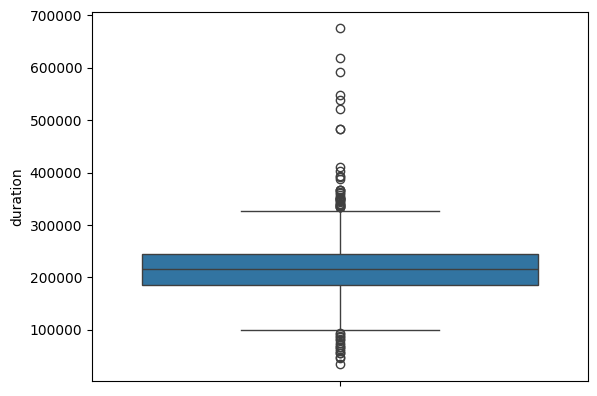

In [ ]:
sns.boxplot (df.duration)

In [ ]:
#Usamos Standar Scaler
scaled_duration = StandardScaler().fit_transform(df[['duration']])

In [ ]:
#Agregamos columna
df_new['duration'] = scaled_duration

In [ ]:
#Hacer analisis con o sin outlier de duracion. Eliminaamos los valores que están por encima del 0.95 %
outliers_dur= df_new['duration'].quantile(0.95)

# Luego, filtramos el DataFrame para eliminar las filas que están por encima del último cuartil
df_filtrado= df_new[df_new['duration'] <= outliers_dur]

In [ ]:
df_new.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.500000,0.596439,-6.868580e-17,1.500000,0.109333,4.829333,0.203376,-8.509339,0.741333,0.058667,120.405761,3.902667,0.497321,0.602667
std,1.119973,0.172036,1.000667e+00,1.119973,0.312265,3.636001,0.177609,5.039488,0.438194,0.240767,28.378116,0.400091,0.239615,0.489673
min,0.000000,0.107000,-2.841952e+00,0.000000,0.000000,0.000000,0.024000,-29.601000,0.000000,0.000000,55.747000,1.000000,0.033200,0.000000
25%,0.250000,0.480000,-5.282331e-01,0.250000,0.000000,1.000000,0.094550,-10.173500,0.000000,0.000000,98.998000,4.000000,0.297000,0.000000
50%,1.500000,0.606000,-7.634928e-02,1.500000,0.000000,5.000000,0.129000,-7.270000,1.000000,0.000000,120.104500,4.000000,0.483000,1.000000
75%,2.750000,0.715750,3.680586e-01,2.750000,0.000000,8.000000,0.264750,-5.097750,1.000000,0.000000,138.074750,4.000000,0.684500,1.000000
max,3.000000,0.986000,6.945679e+00,3.000000,1.000000,11.000000,0.979000,-0.533000,1.000000,2.000000,204.162000,5.000000,0.975000,1.000000


In [ ]:
#eliminación de duplicados para los 3 dataframes
size_antes = len(df)
df_filtrado = df_filtrado.drop_duplicates()
df_new = df_new.drop_duplicates()
df = df.drop_duplicates()
size_despues = len(df_filtrado)
print(f'se eliminaron: {size_antes-size_despues} filas duplicadas')

se eliminaron: 52 filas duplicadas


In [ ]:
#Reindex
df_filtrado.reset_index(drop=True, inplace=True)
df_new.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      698 non-null    int64  
 1   danceability      698 non-null    float64
 2   duration          698 non-null    float64
 3   energy            698 non-null    int64  
 4   instrumentalness  698 non-null    float64
 5   key               698 non-null    int64  
 6   liveness          698 non-null    float64
 7   loudness          698 non-null    float64
 8   mode              698 non-null    int64  
 9   speechiness       698 non-null    int64  
 10  tempo             698 non-null    float64
 11  time_signature    698 non-null    int64  
 12  valence           698 non-null    float64
 13  label             698 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 76.5 KB


## FILTRO DE VARIABLES
Vamos a usar un arbol de decisión para filtrar variables y ver si podemos simplificar el modelo con las features que aportan información realmente al problema

In [ ]:
df = pd.read_csv("/content/data_playlist.csv")
df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [ ]:
df_new.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,3,0.514,-1.830645,1,1.0,8,0.1120,-14.835,0,0,119.879,4,0.143,1
1,1,0.714,-0.199770,1,0.0,4,0.2630,-6.935,1,0,123.969,4,0.582,1
2,2,0.630,-0.059696,1,0.0,5,0.1270,-9.290,1,0,139.931,4,0.199,1
3,2,0.810,-1.277002,0,0.0,5,0.1840,-11.005,1,0,109.960,4,0.798,1
4,3,0.465,-0.590027,1,0.0,6,0.0692,-8.137,0,0,90.807,4,0.288,1
5,2,0.633,0.369939,0,0.0,4,0.1230,-12.549,1,0,134.978,4,0.523,1
6,2,0.507,-0.557484,2,0.0,9,0.2960,-6.966,1,0,165.540,4,0.900,0
7,2,0.825,0.594857,1,1.0,1,0.0953,-9.582,1,0,119.038,4,0.243,1
8,3,0.420,2.228524,0,1.0,9,0.0723,-14.700,0,0,183.020,3,0.330,1
9,3,0.292,-0.343277,0,0.0,0,0.2090,-9.758,1,0,140.316,4,0.249,1


In [ ]:
df_filtrado.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,3,0.514,-1.830645,1,1.0,8,0.1120,-14.835,0,0,119.879,4,0.143,1
1,1,0.714,-0.199770,1,0.0,4,0.2630,-6.935,1,0,123.969,4,0.582,1
2,2,0.630,-0.059696,1,0.0,5,0.1270,-9.290,1,0,139.931,4,0.199,1
3,2,0.810,-1.277002,0,0.0,5,0.1840,-11.005,1,0,109.960,4,0.798,1
4,3,0.465,-0.590027,1,0.0,6,0.0692,-8.137,0,0,90.807,4,0.288,1
5,2,0.633,0.369939,0,0.0,4,0.1230,-12.549,1,0,134.978,4,0.523,1
6,2,0.507,-0.557484,2,0.0,9,0.2960,-6.966,1,0,165.540,4,0.900,0
7,2,0.825,0.594857,1,1.0,1,0.0953,-9.582,1,0,119.038,4,0.243,1
8,3,0.292,-0.343277,0,0.0,0,0.2090,-9.758,1,0,140.316,4,0.249,1
9,2,0.525,-0.211518,1,0.0,1,0.3140,-6.448,0,0,199.512,4,0.420,1


In [ ]:
#Dataframe de métricas
col = ['Modelo','Depth','Accuracy','F1','Precision','Recuperación']
df_metricas = pd.DataFrame(columns=col)

In [ ]:
#DF MODIFICADO CON TODOS LOS FEATURES, SIN FILTRAR DURATION
TARGET = ['label']

X = df_new.loc[:, df_new.columns != 'label']
y =df_new[TARGET]

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo Decision Tree
model = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4)
model.fit(X_train, y_train)

# Predecir y evaluar el modelo con todas las características
y_pred_all_features = model.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
precision_all_features = precision_score(y_test, y_pred_all_features)
recall_all_features = recall_score(y_test, y_pred_all_features)
f1_all_features = f1_score(y_test, y_pred_all_features)

altura= model.get_depth();

df_metricas.loc[0] = ['ARBOL ALL FEATURES CON DISCRETIZACION',altura,accuracy_all_features,f1_all_features,precision_all_features,recall_all_features]



In [ ]:
#DF MODIFICADO CON DURATION FILTRADA POR OUTLIERS SUPERIORES
X_filt = df_filtrado.loc[:, df_filtrado.columns != 'label']
y_filt =df_filtrado[TARGET]
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(X_filt, y_filt, test_size=0.3, random_state=42)

model_filt = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4)
model_filt.fit(X_train_filt, y_train_filt)

y_pred_all_features_filt = model_filt.predict(X_test_filt)
accuracy_all_features_filt = accuracy_score(y_test_filt, y_pred_all_features_filt)
precision_all_features_filt = precision_score(y_test_filt, y_pred_all_features_filt)
recall_all_features_filt = recall_score(y_test_filt, y_pred_all_features_filt)
f1_all_features_filt = f1_score(y_test_filt, y_pred_all_features_filt)

altura= model_filt.get_depth();

df_metricas.loc[2] = ['ARBOL ALL FEATURES CON DISCRETIZACION SIN OUTLIERS',altura,accuracy_all_features_filt,f1_all_features_filt,precision_all_features_filt,recall_all_features_filt]

Filtrando duración da peor precisión que sin filtrar; descartamos ese paso; y sigo comparación entre df_new y df_original

In [ ]:
#DF ORIGINAL
X_orig = df.loc[:, df.columns != 'label']
y_orig =df[TARGET]
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)

model_orig = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4)
model_orig.fit(X_train_orig, y_train_orig)

y_pred_all_features_orig = model_orig.predict(X_test_orig)
accuracy_all_features_orig = accuracy_score(y_test_orig, y_pred_all_features_orig)
precision_all_features_orig = precision_score(y_test_orig, y_pred_all_features_orig)
recall_all_features_orig = recall_score(y_test_orig, y_pred_all_features_orig)
f1_all_features_orig = f1_score(y_test_orig, y_pred_all_features_orig)

altura= model_orig.get_depth();

df_metricas.loc[3] = ['ARBOL ALL FEATURES DF ORIGINAL',altura,accuracy_all_features_orig,f1_all_features_orig,precision_all_features_orig,recall_all_features_orig]


In [ ]:
df_metricas

,Modelo,Depth,Accuracy,F1,Precision,Recuperación
0,ARBOL ALL FEATURES CON DISCRETIZACION,4,0.755656,0.813793,0.808219,0.819444
2,ARBOL ALL FEATURES CON DISCRETIZACION SIN OUTL...,4,0.728571,0.783270,0.720280,0.858333
3,ARBOL ALL FEATURES DF ORIGINAL,4,0.786667,0.820896,0.866142,0.780142


In [ ]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Mostrar la importancia de las características
print("Importancia de las características df new:")
print(feature_importance_df)


Importancia de las características df new:
             Feature  Importance
0       acousticness    0.000000
1       danceability    0.238979
2           duration    0.047507
3             energy    0.055516
4   instrumentalness    0.000000
5                key    0.000000
6           liveness    0.015969
7           loudness    0.474388
8               mode    0.000000
9        speechiness    0.045994
10             tempo    0.121647
11    time_signature    0.000000
12           valence    0.000000


In [ ]:
# Obtener la importancia de las características
importances_orig = model_orig.feature_importances_
feature_importance_df_orig = pd.DataFrame({'Feature': X_orig.columns, 'Importance': importances_orig})

# Mostrar la importancia de las características
print("Importancia de las características df original:")
print(feature_importance_df_orig)

Importancia de las características df original:
             Feature  Importance
0       acousticness    0.139236
1       danceability    0.017556
2           duration    0.075362
3             energy    0.043941
4   instrumentalness    0.021676
5                key    0.000000
6           liveness    0.000000
7           loudness    0.186152
8               mode    0.000000
9        speechiness    0.486530
10             tempo    0.011992
11    time_signature    0.017556
12           valence    0.000000


#

In [ ]:
#df_new CON SELECTED FEATURES
# Seleccionar las características más importantes a partir de la mediana
selector = SelectFromModel(model, prefit=True, threshold='median')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
# print("Características seleccionadas:")
print(selected_features)

# Entrenar el modelo Decision Tree con las características seleccionadas
model_selected = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4)
model_selected.fit(X_train_selected, y_train)

# Predecir y evaluar el modelo con las características seleccionadas
y_pred_selected_features = model_selected.predict(X_test_selected)
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
precision_selected_features = precision_score(y_test, y_pred_selected_features)
recall_selected_features = recall_score(y_test, y_pred_selected_features)
f1_selected_features = f1_score(y_test, y_pred_selected_features)

altura= model_selected.get_depth();
df_metricas.loc[1] = ['ARBOL SELECTED FEATURES CON DISCRETIZACION',altura,accuracy_selected_features,f1_selected_features,precision_selected_features,recall_selected_features]

Index(['danceability', 'duration', 'energy', 'liveness', 'loudness',
       'speechiness', 'tempo'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
#df new CON SELECTED FEATURES PROFUNDIDAD TOTAL (HASTA 1 HOJA)

# Entrenar el modelo Decision Tree con las características seleccionadas
model_selected_p = DecisionTreeClassifier(criterion='gini',random_state=42)
model_selected_p.fit(X_train_selected, y_train)

# Predecir y evaluar el modelo con las características seleccionadas
y_pred_selected_features_p = model_selected.predict(X_test_selected)
accuracy_selected_features_p = accuracy_score(y_test, y_pred_selected_features_p)
precision_selected_features_p = precision_score(y_test, y_pred_selected_features_p)
recall_selected_features_p = recall_score(y_test, y_pred_selected_features_p)
f1_selected_features_p = f1_score(y_test, y_pred_selected_features_p)

altura= model_selected_p.get_depth();
df_metricas.loc[4] = ['ARBOL SELECTED FEATURES CON DISCRETIZACION PROF TOTAL',altura,accuracy_selected_features_p,f1_selected_features_p,precision_selected_features_p,recall_selected_features_p]

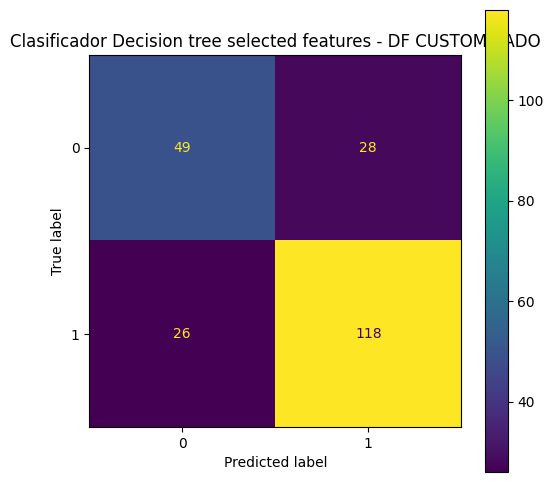

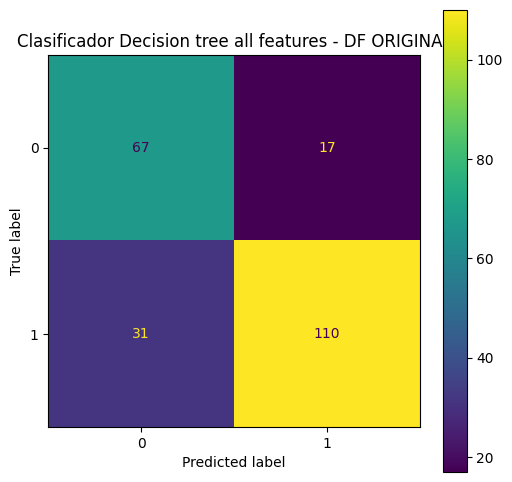

In [ ]:
# Matriz de confusión
cm_class_tree = confusion_matrix(y_test,y_pred_selected_features)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_class_tree,
                              display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Decision tree selected features - DF CUSTOMIZADO");

cm_class_tree_orig = confusion_matrix(y_test_orig,y_pred_all_features_orig)
disp_orig = ConfusionMatrixDisplay(confusion_matrix=cm_class_tree_orig,
                              display_labels=model_orig.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp_orig.plot(ax=ax)
ax.set_title("Clasificador Decision tree all features - DF ORIGINAL");

In [ ]:
#from sklearn.tree import export_graphviz
#export_graphviz(model_selected, out_file = "arbol_class.dot", feature_names=selected_features, rounded=True, filled=True)

Text(0.5, 1.0, 'Decision Tree')

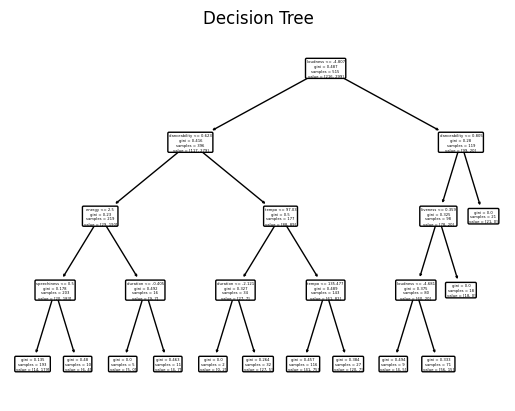

In [ ]:
#ARBOL selected features - DF CUSTOMIZADO
plt.figure()
ax = plt.axes()
plot_tree(model_selected, feature_names=selected_features, rounded=True, ax=ax);
plt.title("ARBOL selected features - DF CUSTOMIZADO")

Text(0.5, 1.0, 'ARBOL selected features - DF ORIGIAL')

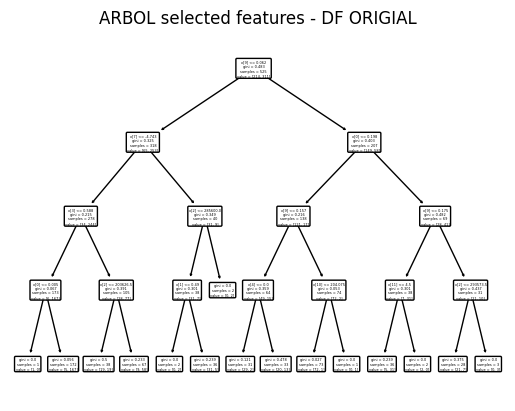

In [ ]:
#ARBOL all  features - DF original
plt.figure()
ax = plt.axes()
plot_tree(model_orig, rounded=True, ax=ax);
plt.title("ARBOL selected features - DF ORIGIAL")

In [ ]:
df_metricas

,Modelo,Depth,Accuracy,F1,Precision,Recuperación
0,ARBOL ALL FEATURES CON DISCRETIZACION,4,0.755656,0.813793,0.808219,0.819444
2,ARBOL ALL FEATURES CON DISCRETIZACION SIN OUTL...,4,0.728571,0.783270,0.720280,0.858333
3,ARBOL ALL FEATURES DF ORIGINAL,4,0.786667,0.820896,0.866142,0.780142
1,ARBOL SELECTED FEATURES CON DISCRETIZACION,4,0.755656,0.813793,0.808219,0.819444
4,ARBOL SELECTED FEATURES CON DISCRETIZACION PRO...,15,0.755656,0.813793,0.808219,0.819444


puntos a ver analisis/connclusion
- al ver importancia de variables, podemos hacer modelo con = performance en cuanto a accuracy y menro cantidad de features
- Ver importancia de recuperación y F1
- ver por que la perfrmance es mejor en original que con analiss de datoss